### Import Libraries and Loading dataset




In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Loading dataset
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/SIC/COVID19_Analysis&Prediction/final_data.csv')
#Identify Columns
df.head()

MessageError: Error: credential propagation was unsuccessful

In [ ]:
df.shape

(496291, 17)

In [ ]:
features=['sex', 'patient_type', 'pneumonia', 'pregnancy',
       'diabetes', 'copd', 'asthma', 'inmsupr', 'hypertension',
       'other_disease', 'cardiovascular', 'obesity', 'renal_chronic',
       'tobacco', 'contact_other_covid']

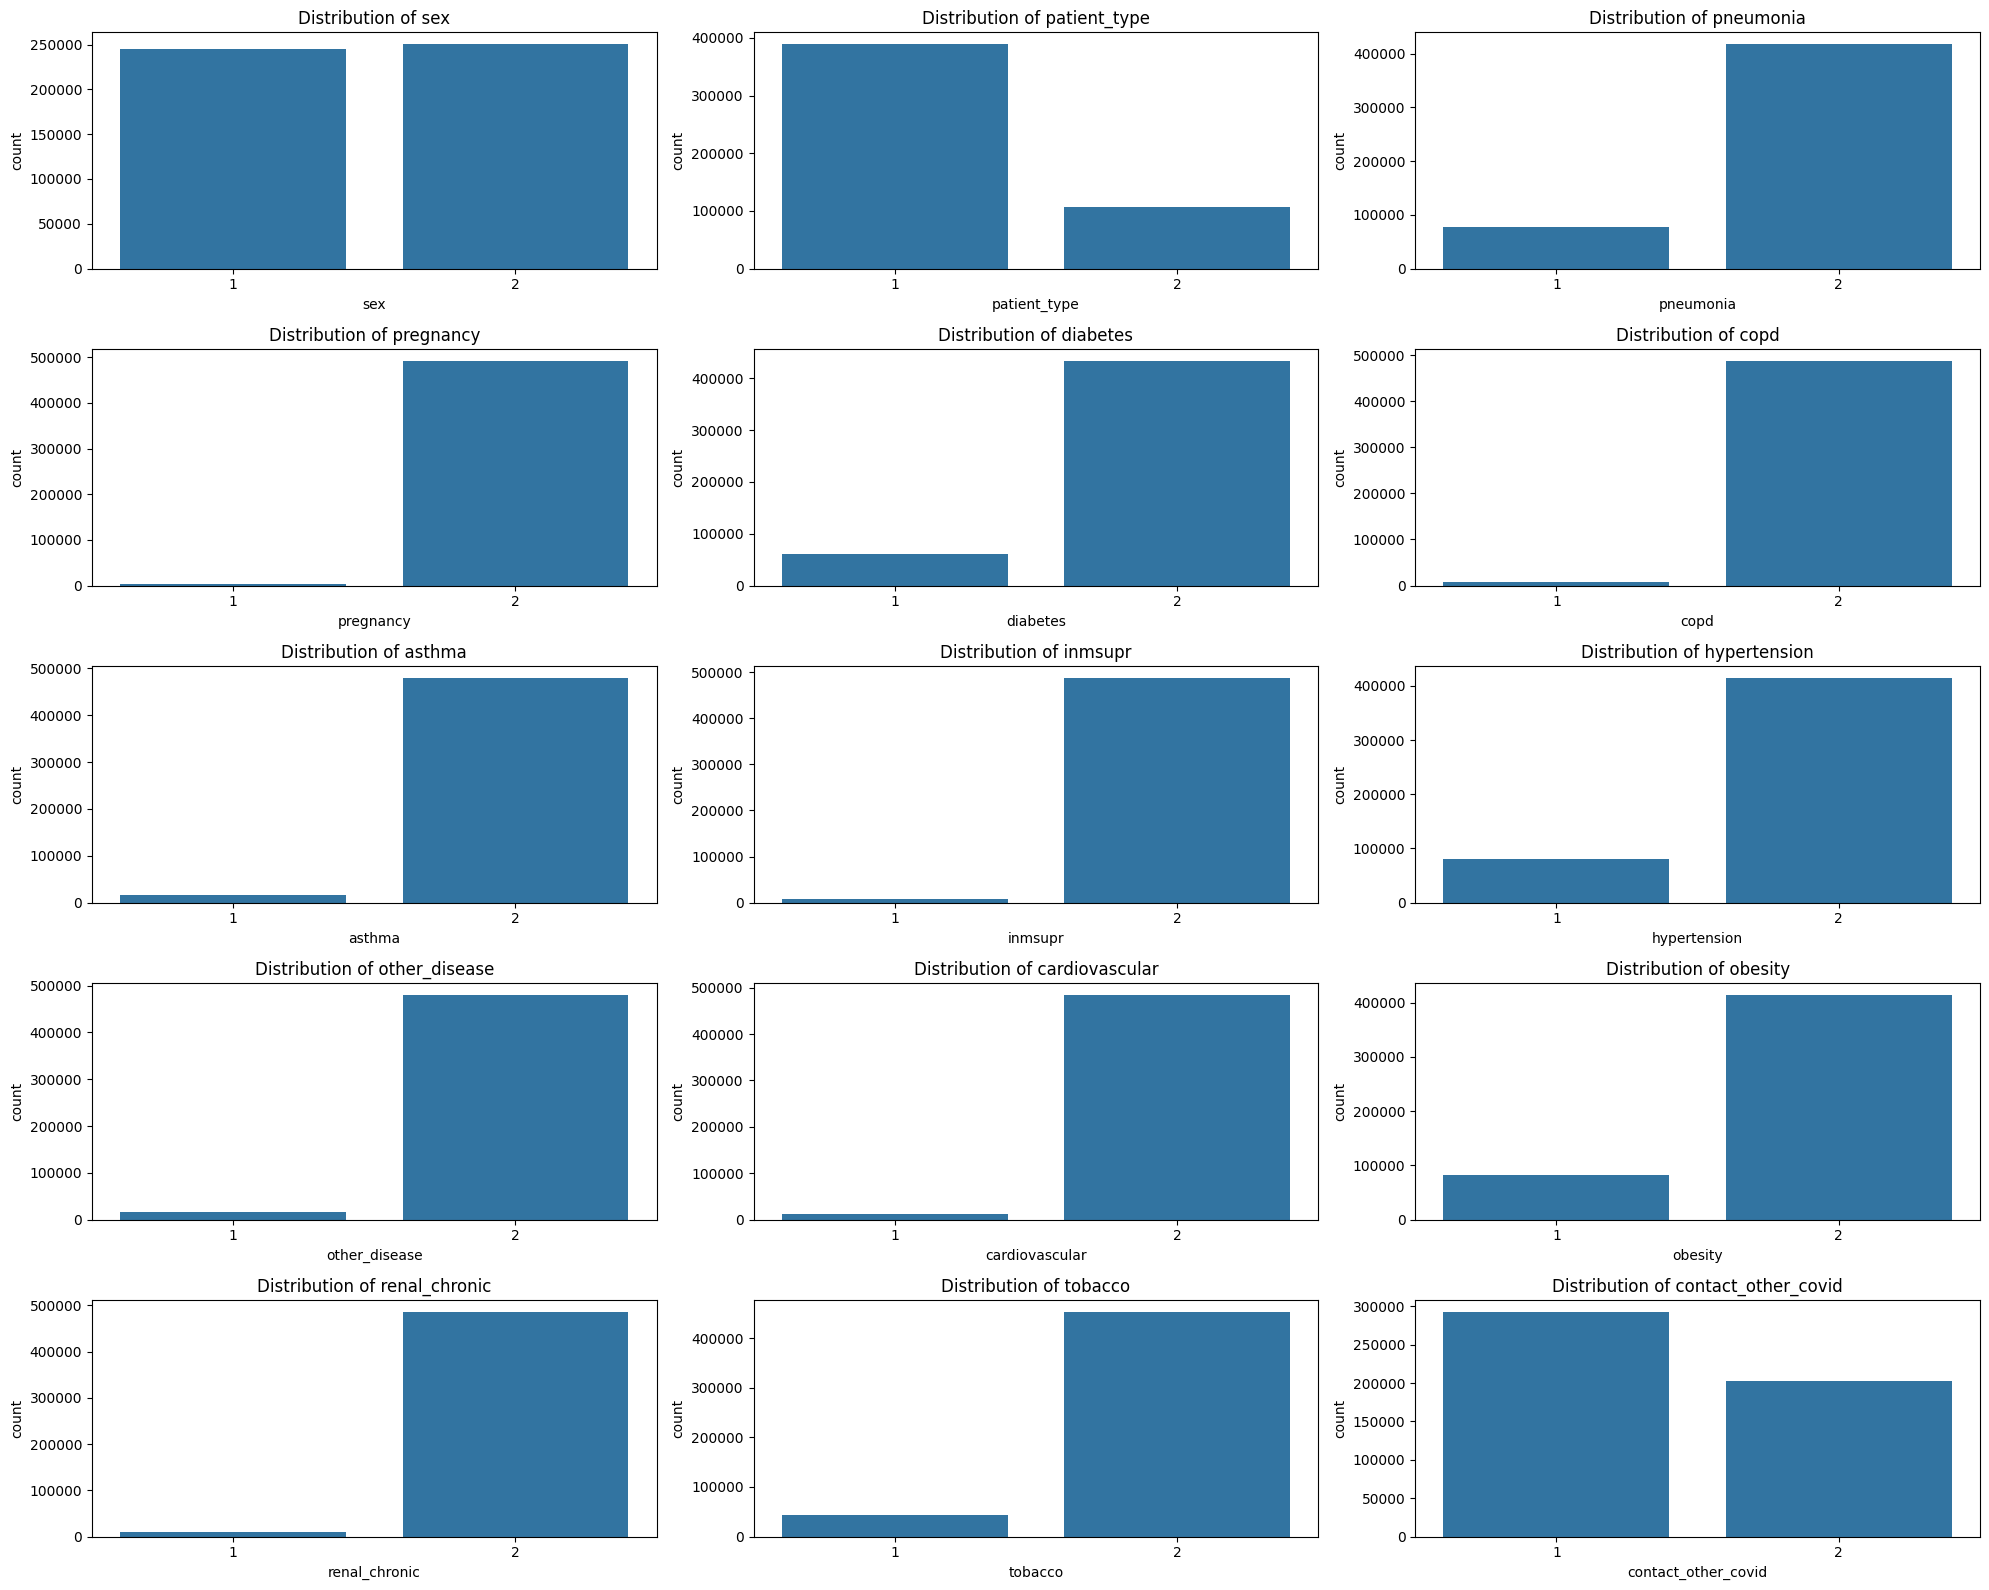

In [ ]:
# Ma trận biểu đồ cột thể hiện số lượng bệnh nhân của từng thuộc tính: (Châu)
fig, axes = plt.subplots(5, 3, figsize=(20, 16))
axes = axes.ravel()
df1=df.copy()

for i, feature in enumerate(features):
    sns.countplot(x=feature, data=df1, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xticklabels(axes[i].get_xticklabels())

plt.tight_layout()
plt.show()

In [1]:
# Biểu đồ tròn (Pie chart) thể hiện phần trăm số lượng người mắc covid và người ko mắc covid. (Đạt)
df2=df.copy()
# Đếm số lượng các giá trị trong cột 'covid_res'
covid_counts = df2['covid_res'].value_counts()

# Xuất giá trị và số lượng
print("Giá trị và số lượng của cột 'covid_res':")
print(covid_counts)
# Tạo danh sách các nhãn và giá trị phần trăm
labels = ['Positive', 'Negative']
sizes = [covid_counts.get(1, 0), covid_counts.get(0, 0)]

# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99'])

# Thêm tiêu đề
plt.title('Phần trăm kết quả COVID-19')

# Hiển thị biểu đồ
plt.axis('equal')  # Đảm bảo biểu đồ tròn
plt.show()

NameError: name 'df' is not defined

Nhận xét: Biểu đồ trên đã thể hiện tỉ lệ số người mắc và không mắc covid

*   Âm tính: 55.8%
*   Dương tính: 44.2%









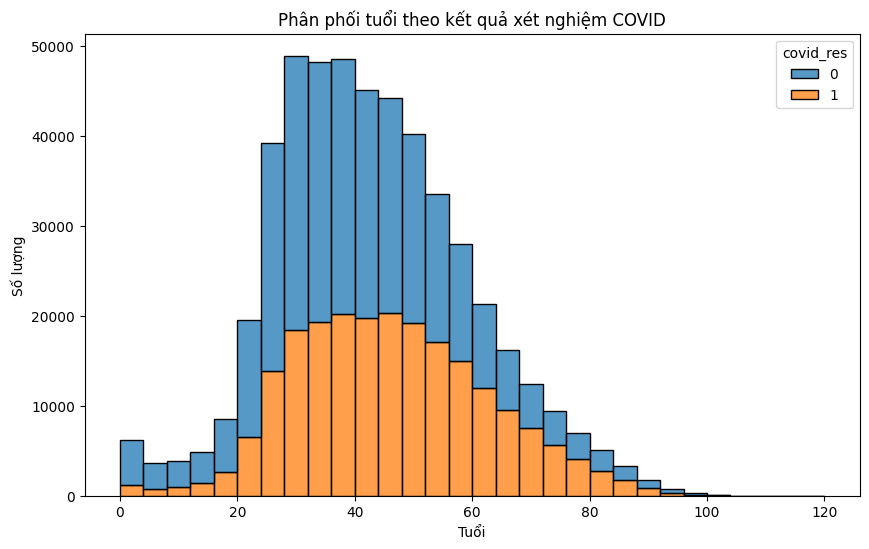

In [ ]:
# Biểu đồ phân tán (Histogram) mối quan hệ giữa tuổi và kết quả xét nghiệm covid. (Bảo)
df3 = df.copy()
plt.figure(figsize=(10, 6))
sns.histplot(data=df3, x='age', hue='covid_res', multiple='stack', bins=30)
plt.title('Phân phối tuổi theo kết quả xét nghiệm COVID')
plt.xlabel('Tuổi')
plt.ylabel('Số lượng')
plt.show()

Nhận Xét: biểu đồ phân phối tuổi theo kết quả xét nghiệm covid thì cho thấy phân bố đều ở các nhóm tuổi nhưng mức độ tập trung chủ yếu ở độ tuổi trẻ và trung niên (0-65)
- Nhóm "có tiếp xúc" giảm dần khi ở nhóm tuổi cao hơn
- Số lượng người bị ảnh hưởng lên đến gần 200000 người

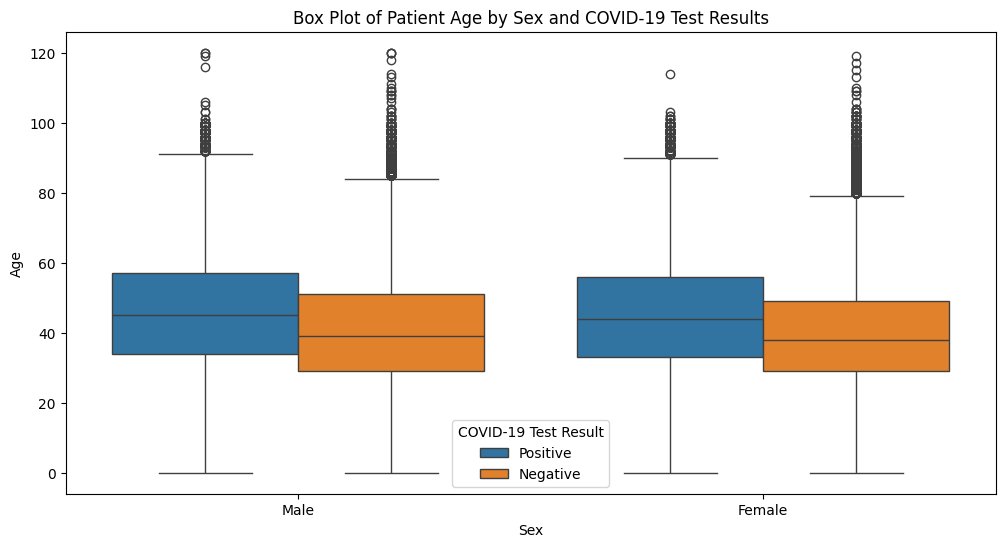

In [ ]:
# Biểu đồ hộp (Box plot) mối quan hệ giữa giới tính và tuổi của bệnh nhân theo kết quả xét nghệm covid
# Ánh xạ giới tính và Covid_res thành các nhãn dễ hiểu
df4 = df.copy()
df4['sex'] = df4['sex'].map({1: 'Female', 2: 'Male'})
df4['covid_res'] = df4['covid_res'].map({1: 'Positive', 0: 'Negative'})

# Tạo sơ đồ hộp
plt.figure(figsize=(12, 6))
sns.boxplot(x='sex', y='age', hue='covid_res', data=df4)
plt.title('Box Plot of Patient Age by Sex and COVID-19 Test Results')
plt.xlabel('Sex')
plt.ylabel('Age')
plt.legend(title='COVID-19 Test Result')
plt.show()

Nhận xét: Biểu đồ cho thấy phân bố tuổi giữa các bệnh nhân COVID-19 dương tính và âm tính là khá giống nhau bất kể giới tính. Phần lớn bệnh nhân có độ tuổi từ 30 đến 60, với một số bệnh nhân cao tuổi được biểu thị dưới dạng giá trị ngoại lệ.

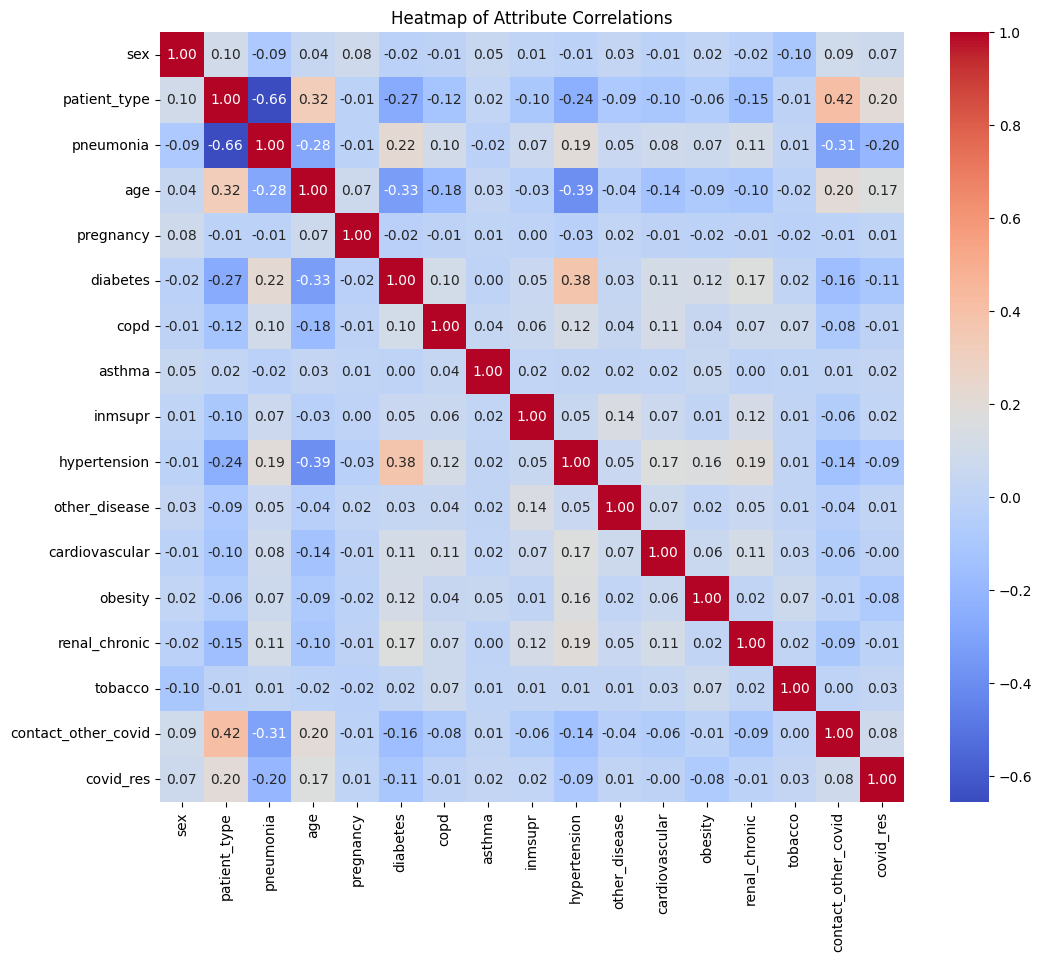

In [ ]:
# Biểu đồ nhiệt (Head map) thể hiện độ tương quan giữa cái thuộc tính. (Yến)
df4 = df.copy()
# Tính ma trận tương quan
correlation_matrix = df4.corr()

# Vẽ biểu đồ nhiệt
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Attribute Correlations')
plt.show()

Nhận xét:
- Tương quan với biến phụ thuộc (covid_res) và các biến độc lập khá thấp.
- Các biên tương quan cao với nhau: patient_type, intubed, icu và patient_type tương quan với biến phụ thuộc cao nhất (0.2)
-> Khi tiến hành train model, nhóm sẽ không lấy biến intubed, icu

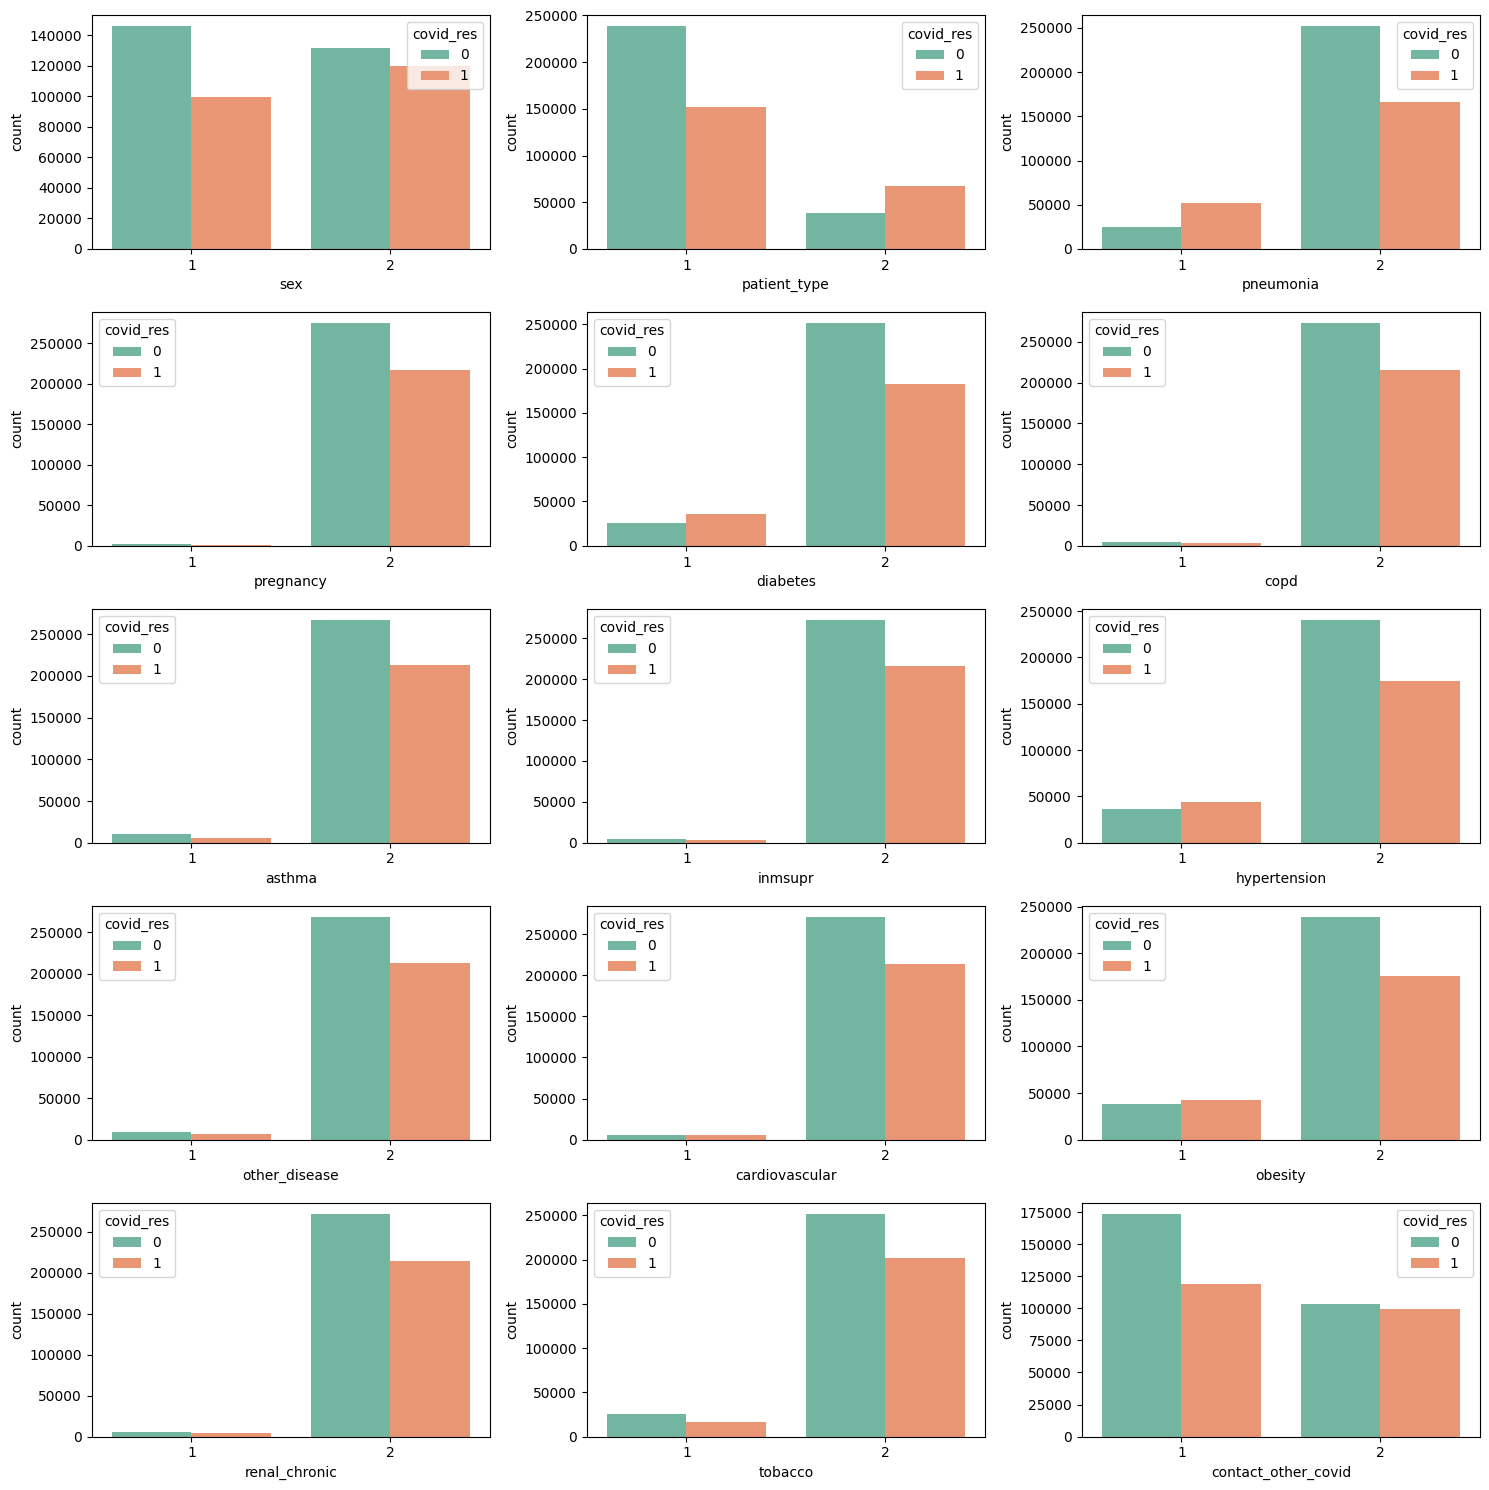

In [ ]:
# Ma trận biểu đồ cột thể hiện số lượng người mắc covid với người ko mắc covid theo từng thuộc tính: (Ý)
df5 = df.copy()
plt.figure(figsize=(15,15))
for i in enumerate(features):
    plt.subplot(5,3,i[0]+1)
    sns.countplot(x=i[1],hue='covid_res',data=df5, palette='Set2')
    plt.tight_layout()